In [1]:
import pandas as pd
import numpy as np
import gmplot

import matplotlib.pyplot as plt

In [57]:
crime = pd.read_csv('crime.csv', encoding = 'unicode_escape')
crime['OCCURRED_ON_DATE'] = pd.to_datetime(crime['OCCURRED_ON_DATE'])
crime.index = crime['OCCURRED_ON_DATE']
crime = crime[crime['SHOOTING'] == 'Y']

In [58]:
crime.info()
pd.unique(crime['OCCURRED_ON_DATE'].dt.year)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1019 entries, 2018-08-29 23:19:00 to 2015-06-16 20:41:00
Data columns (total 17 columns):
INCIDENT_NUMBER        1019 non-null object
OFFENSE_CODE           1019 non-null int64
OFFENSE_CODE_GROUP     1019 non-null object
OFFENSE_DESCRIPTION    1019 non-null object
DISTRICT               1017 non-null object
REPORTING_AREA         1019 non-null object
SHOOTING               1019 non-null object
OCCURRED_ON_DATE       1019 non-null datetime64[ns]
YEAR                   1019 non-null int64
MONTH                  1019 non-null int64
DAY_OF_WEEK            1019 non-null object
HOUR                   1019 non-null int64
UCR_PART               1014 non-null object
STREET                 996 non-null object
Lat                    985 non-null float64
Long                   985 non-null float64
Location               1019 non-null object
dtypes: datetime64[ns](1), float64(2), int64(4), object(10)
memory usage: 143.3+ KB


array([2018, 2017, 2016, 2015], dtype=int64)

In [59]:
crime.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
OCCURRED_ON_DATE,,,,,,,,,,,,,,,,,
2018-08-29 23:19:00,I182069509,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,E18,540,Y,2018-08-29 23:19:00,2018,8,Wednesday,23,Part One,HILLIS RD,42.250405,-71.131737,"(42.25040550, -71.13173740)"
2018-08-27 22:56:00,I182068876,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B2,183,Y,2018-08-27 22:56:00,2018,8,Monday,22,Part One,DUDLEY ST,42.321042,-71.072153,"(42.32104169, -71.07215291)"
2018-08-22 15:00:00,I182067317,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",B2,312,Y,2018-08-22 15:00:00,2018,8,Wednesday,15,Part One,HOLLANDER ST,42.315689,-71.089514,"(42.31568920, -71.08951391)"
2018-08-22 15:00:00,I182067317,2662,Ballistics,BALLISTICS EVIDENCE/FOUND,B2,312,Y,2018-08-22 15:00:00,2018,8,Wednesday,15,Part Two,HOLLANDER ST,42.315689,-71.089514,"(42.31568920, -71.08951391)"
2018-08-19 22:46:00,I182066420,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A15,900,Y,2018-08-19 22:46:00,2018,8,Sunday,22,Part One,MCNULTY CT,42.378085,-71.057841,"(42.37808452, -71.05784115)"


In [60]:
yearsDt        = list(pd.unique(crime['OCCURRED_ON_DATE'].dt.year))
shootingInYear = []

In [61]:
crime[crime['SHOOTING'] == 'Y'].loc['2018']
for year in yearsDt:
    print(str(year) + " -> " + str(len(crime[crime['SHOOTING'] == 'Y'].loc[str(year)])))
    shootingInYear.append(len(crime[crime['SHOOTING'] == 'Y'].loc[str(year)]))

2018 -> 185
2017 -> 370
2016 -> 279
2015 -> 185


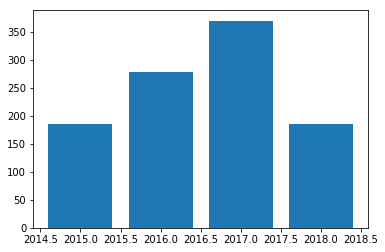

In [62]:
plt.bar(yearsDt, shootingInYear)
plt.show()

In [63]:
year = '2018'

lat  = crime.loc[year].head().Lat
long = crime.loc[year].head().Long

In [64]:
import plotly.graph_objects as go

mapbox_access_token = "pk.eyJ1IjoidGFudmlyZHVnZ2FsIiwiYSI6ImNqeXQyMzUxYTAyNngzZHRjaXo2Z20wcjUifQ.HJwGfHmhnXU8vadaOfBy-g"

for year in yearsDt:
    lat  = crime.loc[str(year)].head().Lat
    long = crime.loc[str(year)].head().Long
    fig = go.Figure(go.Scattermapbox(
        lat=lat,
        lon=long,
        mode='markers',
        marker=go.scattermapbox.Marker(
            size=9,
            color='red'
        ),
    ))

    fig.update_layout(
        autosize=True,
        hovermode='closest',
        mapbox=go.layout.Mapbox(
            accesstoken=mapbox_access_token,
            bearing=0,
            center=go.layout.mapbox.Center(
                lat = 42.3,
                lon =-71.1
            ),
            pitch=0,
            zoom=10
        ),
    )

    fig.show()


In [65]:
monthWhenCrime = list(pd.unique(crime['OCCURRED_ON_DATE'].dt.month))
countMonth     = []

monthData      = {}

for i in range(1, 13):
    monthData[str(i)] = len(crime[crime['MONTH'] == i])
    
monthData


{'1': 70,
 '2': 52,
 '3': 39,
 '4': 71,
 '5': 71,
 '6': 121,
 '7': 135,
 '8': 109,
 '9': 80,
 '10': 86,
 '11': 72,
 '12': 113}

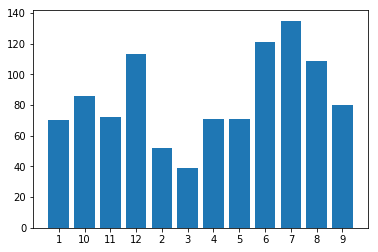

In [66]:
plt.bar(*zip(*sorted(monthData.items())))
plt.show()

In [67]:
monthWhenCrime = list(pd.unique(crime['OCCURRED_ON_DATE'].dt.month))
dt             = {}

In [68]:
for year in yearsDt:
    dt[year] = {}
    for month in range(1,13):
        curDate = str(year)+"-"+str(month)
        dt[year][month] = len(crime.loc[curDate])

In [69]:
dt

{2018: {1: 31,
  2: 16,
  3: 9,
  4: 20,
  5: 27,
  6: 34,
  7: 27,
  8: 21,
  9: 0,
  10: 0,
  11: 0,
  12: 0},
 2017: {1: 22,
  2: 23,
  3: 18,
  4: 38,
  5: 22,
  6: 41,
  7: 39,
  8: 22,
  9: 37,
  10: 38,
  11: 23,
  12: 47},
 2016: {1: 17,
  2: 13,
  3: 12,
  4: 13,
  5: 22,
  6: 34,
  7: 28,
  8: 28,
  9: 21,
  10: 33,
  11: 28,
  12: 30},
 2015: {1: 0,
  2: 0,
  3: 0,
  4: 0,
  5: 0,
  6: 12,
  7: 41,
  8: 38,
  9: 22,
  10: 15,
  11: 21,
  12: 36}}

2018


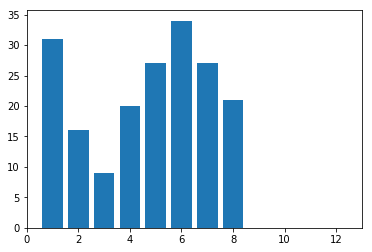

2017


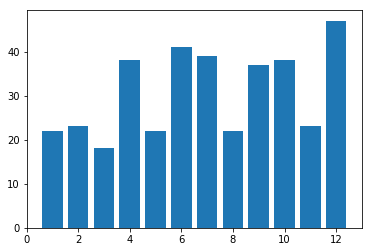

2016


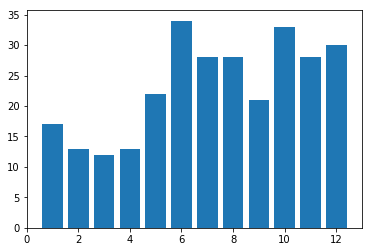

2015


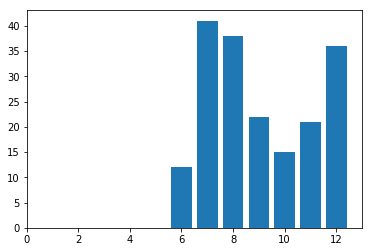

In [70]:
for key, value in dt.items():
    print(key)
    plt.bar(*zip(*sorted(value.items())))
    plt.show()

In [71]:
dayOfWeek = list(pd.unique(crime["DAY_OF_WEEK"]))
weekData  = {}

In [72]:
for day in dayOfWeek:
    weekData[day] = len(crime[crime["DAY_OF_WEEK"] == day])

In [73]:
weekData

{'Wednesday': 134,
 'Monday': 114,
 'Sunday': 155,
 'Tuesday': 114,
 'Saturday': 228,
 'Thursday': 131,
 'Friday': 143}

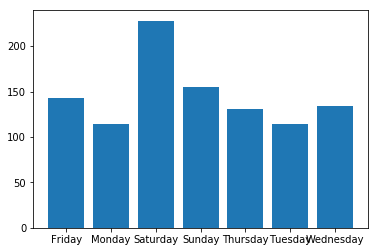

In [74]:
plt.bar(*zip(*sorted(weekData.items())))
plt.show()

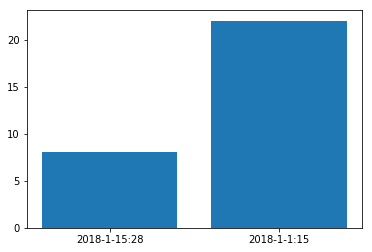

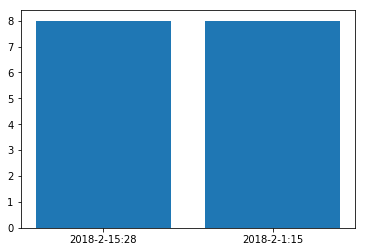

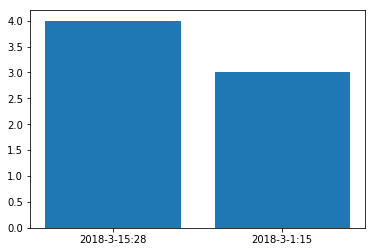

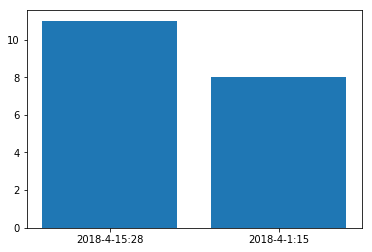

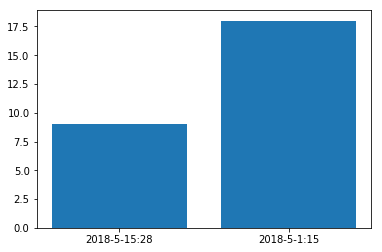

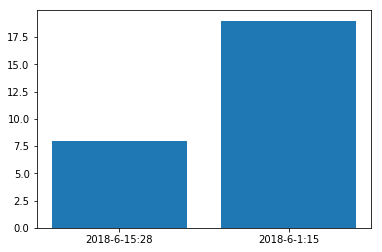

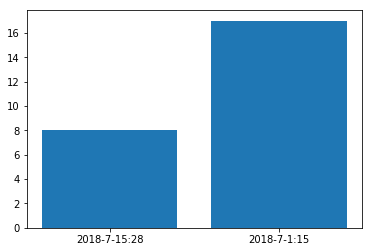

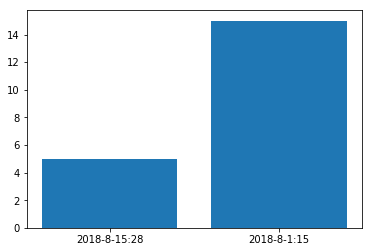

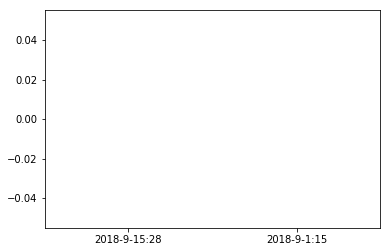

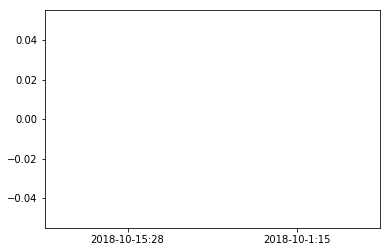

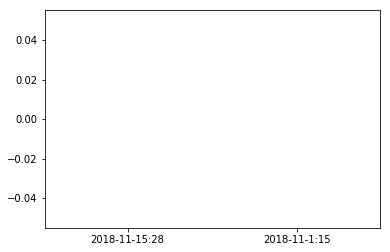

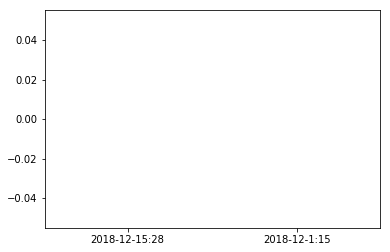

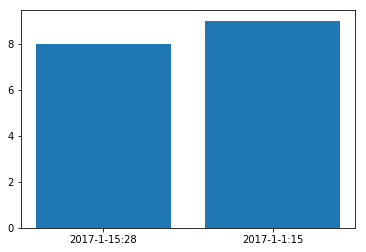

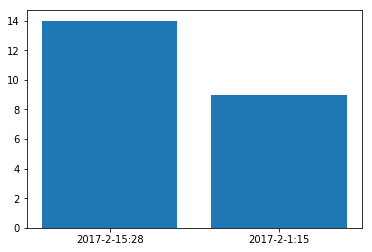

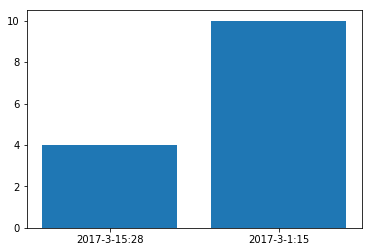

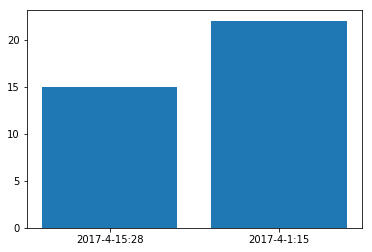

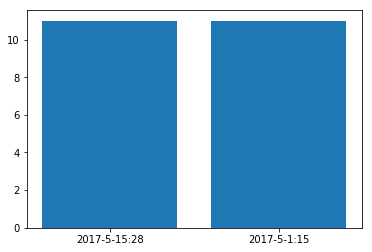

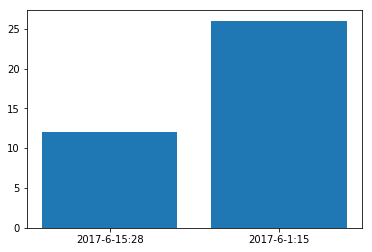

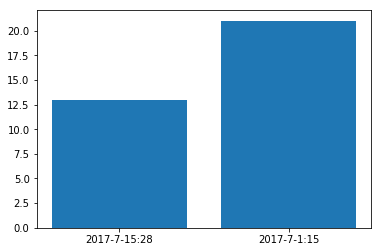

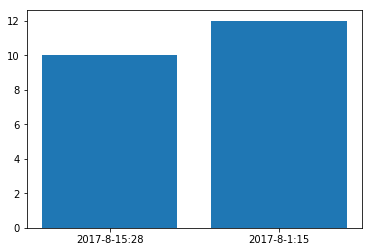

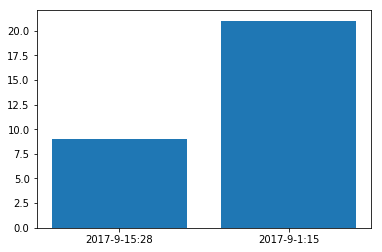

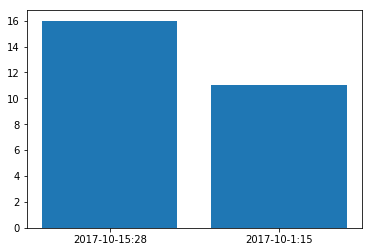

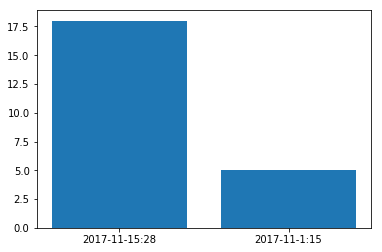

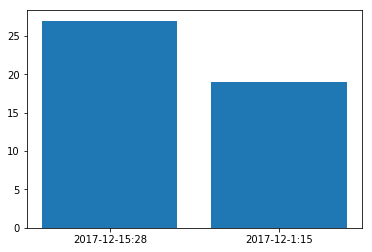

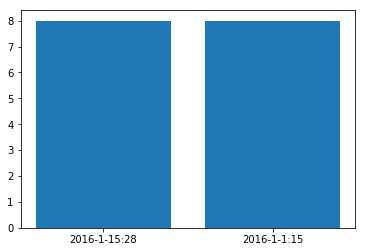

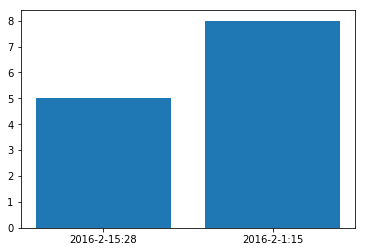

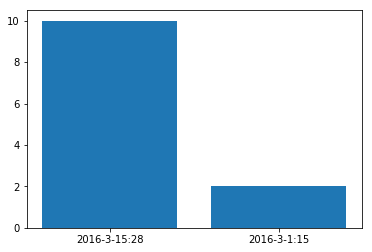

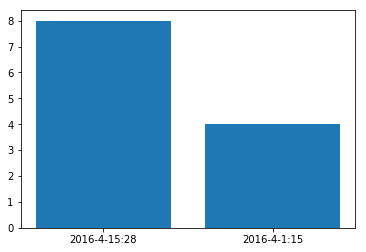

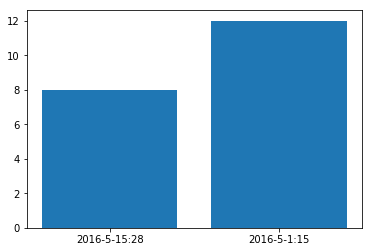

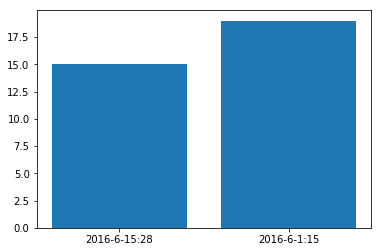

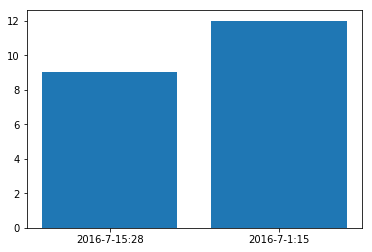

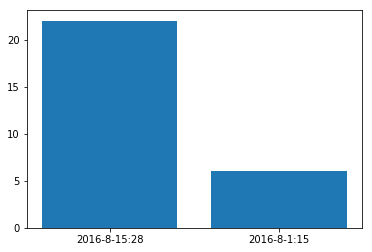

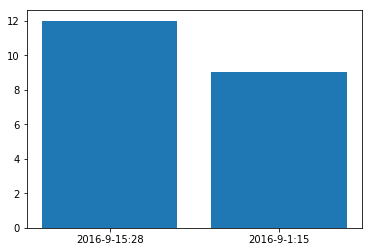

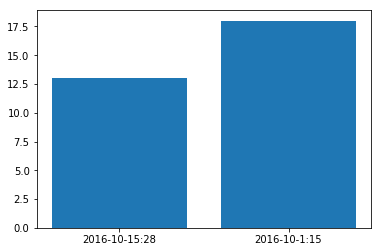

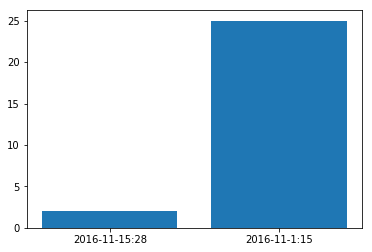

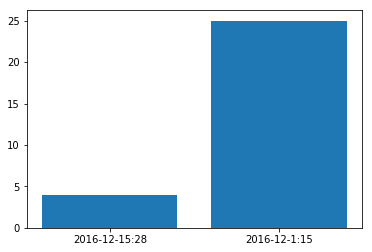

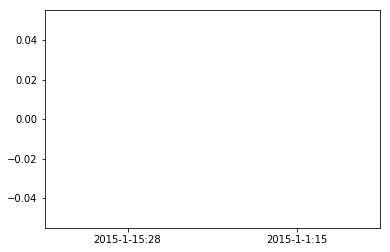

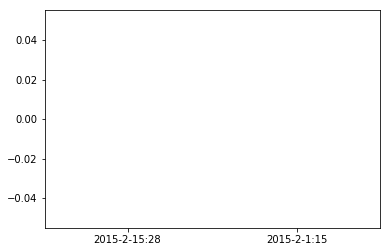

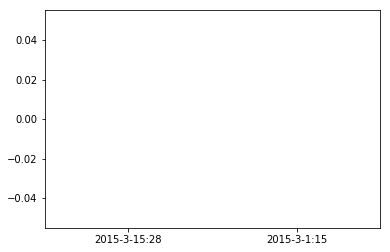

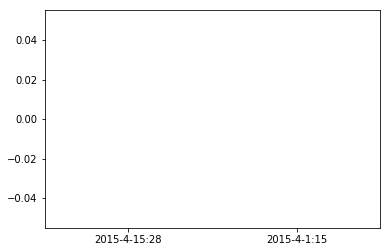

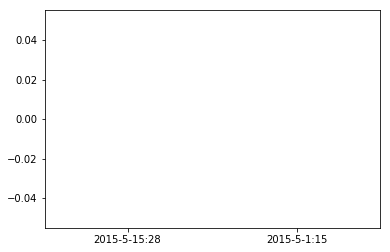

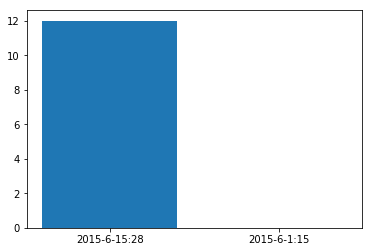

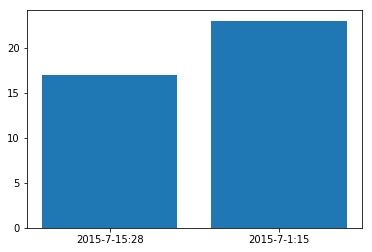

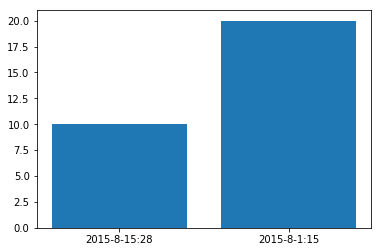

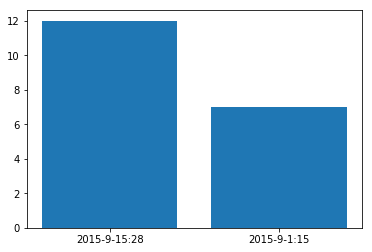

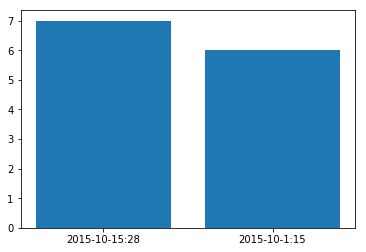

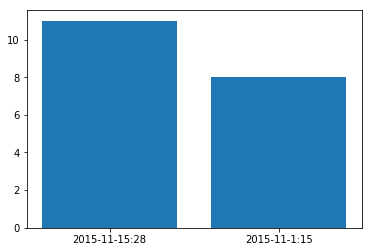

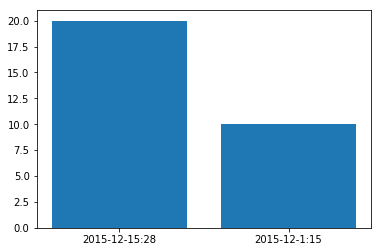

In [75]:
for year in yearsDt:
    for month in range(1, 13):
        dayBased = {}
        upperVal = str(year)+"-"+str(month)+"-"+"1"
        lowerVal = str(year)+"-"+str(month)+"-"+"15"
        dayBased[str(year) + "-" + str(month) + "-1:15" ] = len(crime.loc[upperVal:lowerVal])
        upperVal = str(year)+"-"+str(month)+"-"+"16"
        lowerVal = str(year)+"-"+str(month)+"-"+"28"
        dayBased[str(year) + "-" + str(month) + "-15:28"] = len(crime.loc[upperVal:lowerVal])
        plt.bar(*zip(*sorted(dayBased.items())))
        plt.show()